# Binary classification with Pytorch.

Let's create a pytorch model for classification using these steps in order:


*   Creating our data with sklearn.
*   Visulize the data.

*   Data preparation.
*   Creating a binary classification model with nn.Module.


*   Setup device agnostic code.
*   Training the model


*   Making predictions









# 1- Getting the data.
First we need to imoport make_circles function from sklearn.datasets,[Learn more here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html)

In [1]:
from sklearn.datasets import make_circles

# Make 1000 samples 
n_samples = 1000

# Using make_circles
X,y = make_circles(n_samples, 
                  noise = 0.03, # Adding some random noice to our data to train the model on real world data 
                  random_state = 42 # keep random state so we get the same values
                   )


# 2- Visualize our data.

Let's use matplotlib and check the form of the data.

First we take a look the the data through numirical values:

In [2]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


Let's use pandas 

In [3]:
import pandas as pd

circle = pd.DataFrame({"X1" : X[:, 0],
                       "X2" : X[:, 1],
                       "label" : y})
circle.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0



It looks like each pair of X features (X1 and X2) has a label (y) value of either 0 or 1.

This tells us that our problem is binary classification since there's only two options (0 or 1).

- In Pytorch one of the common errors are shape errors, so let's take a look at the shape of the data

In [4]:
# Check the shapes and dimension of our features and labels
X.shape, y.shape, X.ndim, y.ndim

((1000, 2), (1000,), 2, 1)

AS we can see we have 1000 samples for a 1000 labels, in each sample we have a vector af two features X1 and X2 which forms a 2-rank tensor(matrix)

**Let's plot them.**

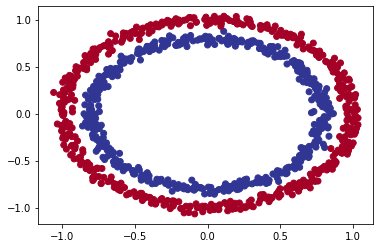

In [5]:
import matplotlib.pyplot as plt 

plt.scatter(x =X[:,0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu
            
            );

# 2- It's time to prepare the data for pytorch computation:

In [6]:
import torch
import torch.nn as nn 

We need to get our data into pytorch tensors with a common dtype for the computaional graphe. 

In [7]:
# For that we use from_numpy method

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
print(X), print("\n",y)

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        ...,
        [-0.1369, -0.8100],
        [ 0.6704, -0.7675],
        [ 0.2811,  0.9638]])

 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
        1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
        1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
        0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
        1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
        0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
        1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
        0., 1., 

(None, None)

In [8]:

# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: tensor([0.7542, 0.2315]) and the same for y: 1.0
Shapes for one sample of X: torch.Size([2]) and the same for y: torch.Size([])


From the first sample of the data we can understand that we have two input features (X1 and X2) for 1 output feauture y.

**Data spliting into test and train data**:

Sklearn provid us with a useful method from [sklearn.mode_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), which can split our data.

In [9]:
# Importing the method

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,# That mean the data will split so, 80% train data and 20% test data
                                                    random_state = 42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

# 3- Model creation: 



1.   Subclasses nn.Module (almost all PyTorch models are subclasses of nn.Module).
2.   Creates 2 nn.Linear layers in the constructor capable of handling the input and output shapes of X and y

3.   Defines a forward() method containing the forward pass computation of the model.
4.   Instantiates the model class and sends it to the target device.








In [10]:
#1 sublassing nn.Module
class CircleModelv0(nn.Module):
  def __init__(self):
    super().__init__()
    #2. reate 2 linear layers to handle X and y
    self.layer_1 = nn.Linear(in_features = 2, out_features =5) # takes 2 features and produces 5
    self.layer_2 = nn.Linear(in_features=5, out_features=1)# the output feature is one because, we have are prediction one label 1 or 0
  #3 Define the forward computation
  def forward(self, x):
    # We need to return the output of the 2nd layer 
    return self.layer_2(self.layer_1(x)) # computation start with the first layer and ends with the second

# Creating an instance of the model
model_0 = CircleModelv0()
model_0

CircleModelv0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

# 4- Using GPU if available:

In [11]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Let's get the data and the model in our computation device : 

In [12]:
x_train = X_train.to(device)
y_train = y_train.to(device)
x_test = X_test.to(device)
y_test = y_test.to(device)

# Model onto the device

model_0 = model_0.to(device)
model_0

CircleModelv0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

**Make predictions before training the model**

In [13]:
# Make predictions with the model
untrained_preds = model_0(x_test)
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.4984],
        [-0.4580],
        [-0.3849],
        [-0.5314],
        [-0.0369],
        [-0.0150],
        [-0.1772],
        [-0.0725],
        [-0.3998],
        [-0.4515]], device='cuda:0', grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0')


# 5- Training the model: 

Before creating a training as testing loop we'll first define our loss function and optimizer.

Different problem types require different loss functions.

For binary classification in deep learning we use the binary cross entropy function which is available under [nn.BCELoss](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) in Pytorch.



Note: Recall a loss function is what measures how wrong your model predictions are, the higher the loss, the worse your model.

Also, PyTorch documentation often refers to loss functions as "loss criterion" or "criterion", these are all different ways of describing the same thing.

Pytorch combines a Sigmoid layer and the BCELoss in one single class. This version is more numerically stable than using a plain Sigmoid followed by a BCELoss as, by combining the operations into one layer, we take advantage of the log-sum-exp trick for numerical stability.

[BCEWITHLOGITSLOSS](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html#bcewithlogitsloss)

For the optimizer we'll use [torch.optim.SGD()](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html).

In [14]:
# 1- Creating an optimizer 

optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1) # we are also using a learning rate of 0.1

# 2- Creating our loss function 

loss_func = nn.BCEWithLogitsLoss()

** Now let's define an evaluation metric, as we know a loss is a way for the model to know how wrong it is and train it, an evaluation metric is used to check how accurate our model is and it's more understandable for human eye. Let's define accuracy as an evaluation metric **

To do so we are going to compare between the number of correct predictions and the wrong ones, which means our accuracy is build so : we devide the number of correct answers according to the labels and over to number of predictions and we multiply it time 100.

In [15]:
# Calculate accuracy (a classification metric)
def accuracy(y_true, y_preds):
  corrects = torch.eq(y_true, y_preds).sum().item()
  acc =(corrects/ len(y_preds))*100
  return acc

**Before training our model let's see what comes from the forward pass (logits)**



In [16]:
# View the frist 5 outputs of the forward pass on the test data

y_logits = model_0(x_test)[:5]
y_logits

tensor([[-0.4984],
        [-0.4580],
        [-0.3849],
        [-0.5314],
        [-0.0369]], device='cuda:0', grad_fn=<SliceBackward0>)

Those outputs are the result of an untrained modeL (random). The outputs are confusing and not interpretable, so let's use a sigmoid function to turn them into prediction brobabilities:

In [17]:
y_preds_probs = torch.sigmoid(y_logits)
y_preds_probs 

tensor([[0.3779],
        [0.3875],
        [0.4049],
        [0.3702],
        [0.4908]], device='cuda:0', grad_fn=<SigmoidBackward0>)

Now we can see that the predictions of the model are between 0 and 1, more specifically:

*   1 if the prob >= 0.5 (class 1)
*   0 if the prob < 0.5 (class 0)


So to turn those prediction probabilities into predictions labels we can round them so:



In [18]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_preds_probs)

y_preds.squeeze()

tensor([0., 0., 0., 0., 0.], device='cuda:0', grad_fn=<SqueezeBackward0>)

Now the model outputs look the same as the test labels so we can compare them.

**Building a training and testing loop:**

In [19]:
torch.manual_seed(42)

# number of epochs
epochs = 100

# Training and evaluation loop
for epoch in range(epochs):
  ### Trainig
  model_0.train()

  # 1.Forward pass (model outputs raw logits)
  y_logits = model_0(x_train).squeeze() # squeeze to remove the 1 more dim
  y_pred = torch.round(torch.sigmoid(y_logits))# turn logits into prediction probs
  
  #2. Calculate loss
  loss = loss_func(y_logits, # nn.BCEWithLogitsLoss works with logits
                   y_train)
  #3 calculation accuracy
  acc = accuracy(y_true = y_train,
                    y_preds = y_pred)
  
  #4 optimization with zero grad 
  optimizer.zero_grad()

  #5 backprobagation

  loss.backward()

  #6 optimization step
  optimizer.step()

  ###Testing 
  model_0.eval()
  with torch.inference_mode():
    # forward pass
    test_logits = model_0(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # loss/accuracy 
    test_loss = loss_func(test_logits,
                          y_test)
    test_acc = accuracy(y_true= y_test,
                           y_preds = test_pred)
    
    # printing what happens every 10 epochs 
    if epoch % 10 == 0:
       print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")
      



Epoch: 0 | Loss: 0.70783, Accuracy: 42.50% | Test loss: 0.70517, Test acc: 43.50%
Epoch: 10 | Loss: 0.70137, Accuracy: 47.62% | Test loss: 0.69880, Test acc: 46.50%
Epoch: 20 | Loss: 0.69875, Accuracy: 48.50% | Test loss: 0.69629, Test acc: 47.00%
Epoch: 30 | Loss: 0.69734, Accuracy: 48.62% | Test loss: 0.69511, Test acc: 48.00%
Epoch: 40 | Loss: 0.69641, Accuracy: 48.88% | Test loss: 0.69447, Test acc: 47.00%
Epoch: 50 | Loss: 0.69572, Accuracy: 49.75% | Test loss: 0.69409, Test acc: 47.00%
Epoch: 60 | Loss: 0.69519, Accuracy: 50.00% | Test loss: 0.69385, Test acc: 46.50%
Epoch: 70 | Loss: 0.69477, Accuracy: 49.62% | Test loss: 0.69370, Test acc: 46.50%
Epoch: 80 | Loss: 0.69443, Accuracy: 50.12% | Test loss: 0.69361, Test acc: 46.50%
Epoch: 90 | Loss: 0.69416, Accuracy: 50.50% | Test loss: 0.69357, Test acc: 46.00%


# 6- Make predections and evaluate the model on it's performence.
From the metrics it looks like our model is random guessing.

Let's make a plot of our model's predictions, the data it's trying to predict on and the decision boundary it's creating for whether something is class 0 or class 1. 

For that we need to import a helper function: 

In [20]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


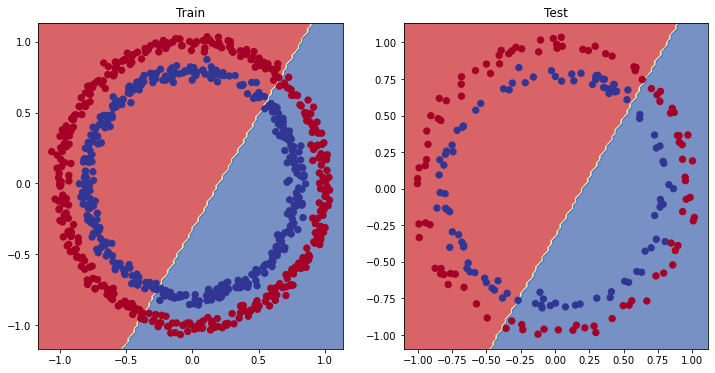

In [21]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

It's currently trying to split the red and blue dots using a straight line.That explains the 50% accuracy. Since our data is circular, drawing a straight line can at best cut it down the middle.
In machine learning we say that the model is **Underfitting** which says that the model didn't learn from the data.

# 7- Improving the model: 

Let's try to fix our model's underfitting problem.

Some data just can't be fit with only straight lines (like what we've seen), using non-linear activation functions can help with this (hint, hint).

# The missing peace:
As we have see out model is a linear model so it's logical that he can only handle linear data like staight lines but not circlular data as ours. We can solve that by adding non-linearity activation function, in this example we are going to use RELU (rectified linear unit) we outputs 0 if the input is negative and the iput itself if it's positive. it's implemented so in pytorch :[nn.ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)



So let's build a better version of the model:

In [22]:
# Build model with non-linear activation function

class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model 
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [24]:
# Setup optimizer 

optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [25]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss and accuracy
    loss = loss_func(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy(y_true=y_train, 
                    y_preds=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(x_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_func(test_logits, y_test)
      test_acc = accuracy(y_true=y_test,
                          y_preds=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test Loss: 0.69102, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test Loss: 0.68940, Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test Loss: 0.68723, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test Loss: 0.68411, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test Loss: 0.67941, Test Accuracy: 56.50%
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test Loss: 0.67285, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test Loss: 0.66322, Test Accuracy: 59.00%
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test Loss: 0.64757, Test Accuracy: 67.50%
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test Loss: 0.62145, Test Accuracy: 79.00%


As we can see we added more accuracy to the model by adding non-linear activation functions.

# 8- Evaluating the model:

First let's make predictions 

In [26]:
# Make predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(x_test))).squeeze()
y_preds[:10], y[:10] # want preds in same format as truth labels

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

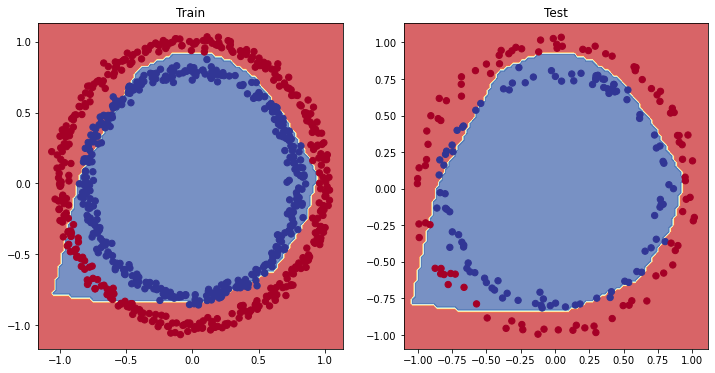

In [28]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

We can see that the model have learned circular patterns.